In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.layers import Normalization

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Import Statsmodels
import scipy.stats as stats
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from pandas import read_csv, DataFrame
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from keras.optimizers import SGD
#from keras.layers.normalization import BatchNormalization
#from keras.layers.normalization import BatchNormalization 
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split

print(tf.__version__)

2.14.0


In [2]:
RANDOM_STATE = 3000

In [3]:
X_nup = pd.read_excel("C:\ds\X_nup.xlsx")
X_bp = pd.read_excel("C:\ds\X_bp.xlsx")
df=pd.merge(X_bp,X_nup, how='inner')
df.drop('Unnamed: 0', axis= 1 , inplace= True ) 
df.shape

(1023, 13)

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   
7                         2.561475            1900.0             535.000000   
8                         3.557018            1930.0             889.000000   
9                         3.532338            2100.0            1421.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   
7                       111.86                        22.267857   
8                       129.00                        21.250000   
9                       129.00                        21.250000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   
7                284.615385                          380.0   
8                300.000000                          380.0   
9                300.000000                         1010.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   
7                                  75.0                         1800.0   
8                                  75.0                         1800.0   
9                                  78.0                         2000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0  
7                    120.0                   0          7.0               47.0  
8                    120.0                   0          7.0               57.0  
9                    300.0                   0          7.0               60.0

In [5]:

df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

13
Плотность, кг/м3


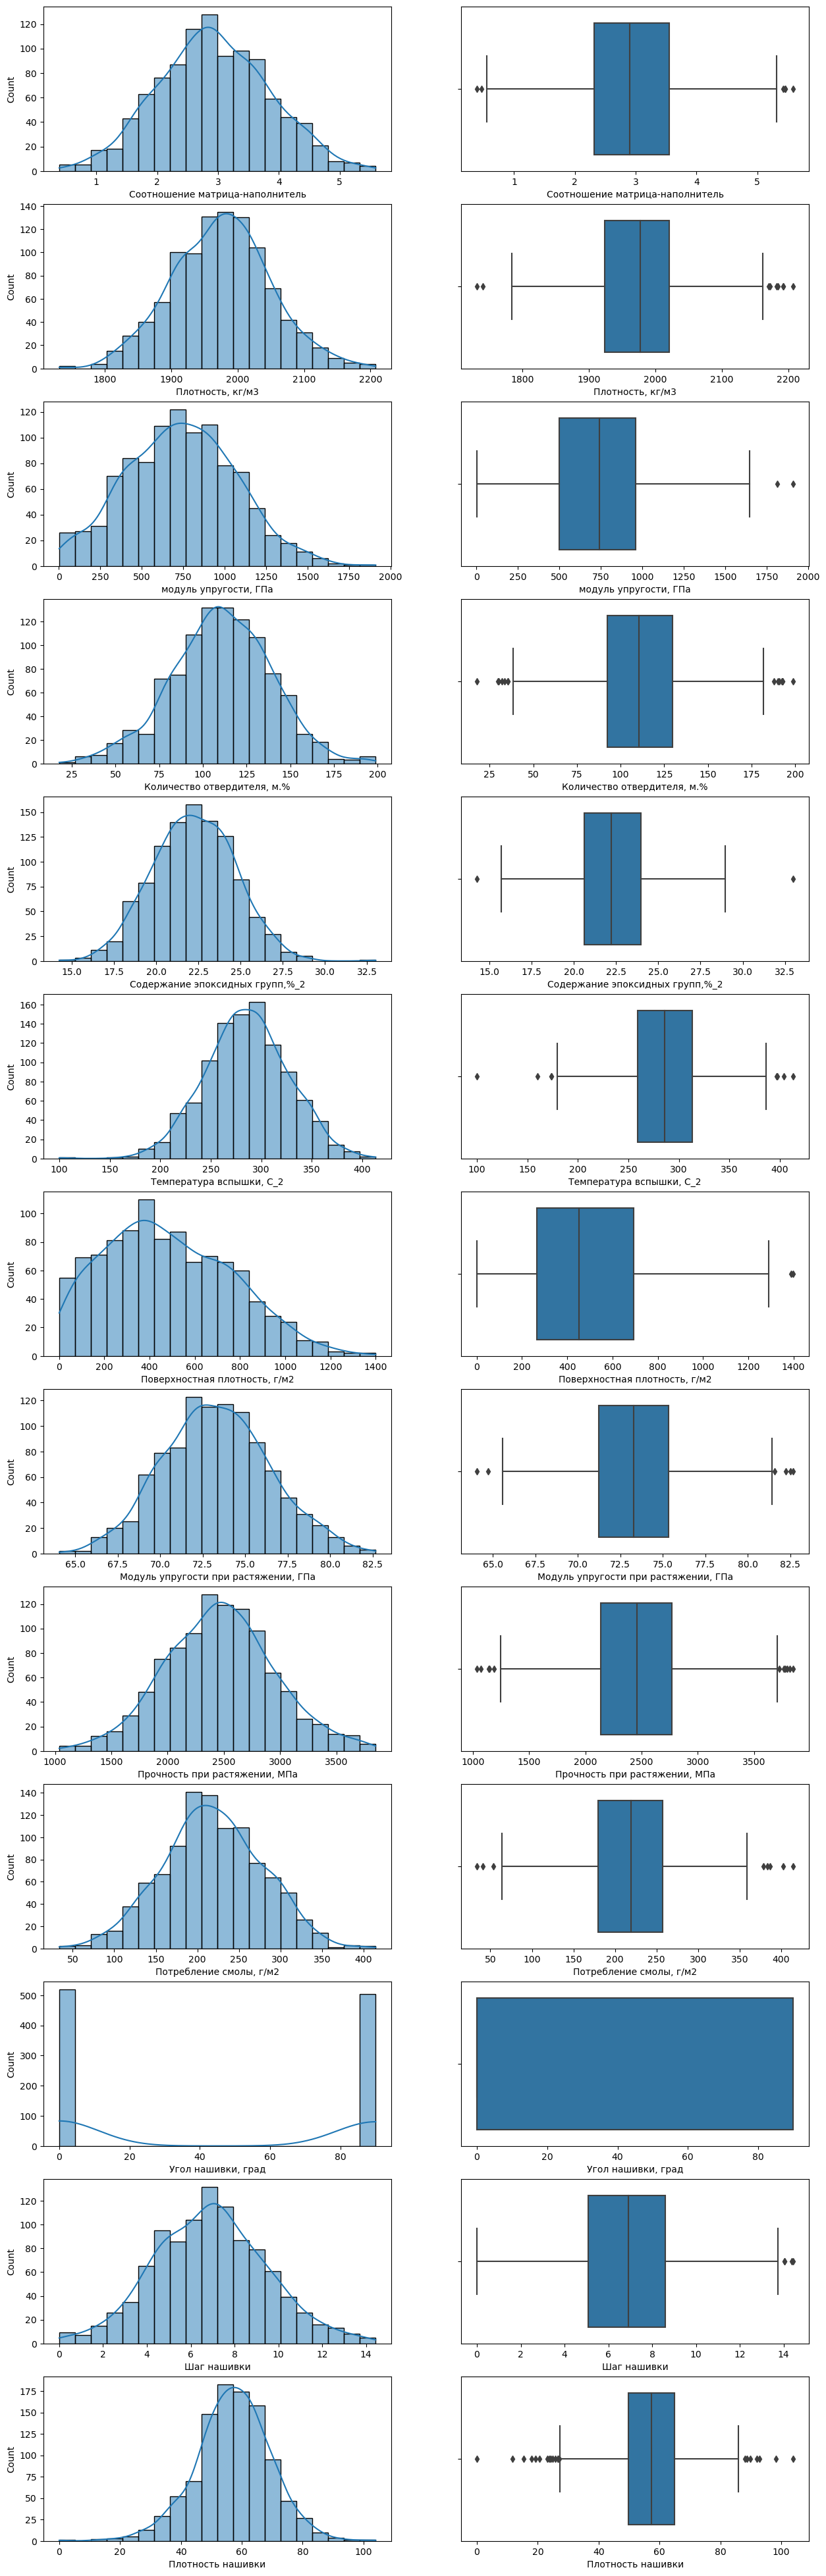

In [214]:
print(len(df.columns))
print(df.columns[1])
fig, axes = plt.subplots(13, 2, figsize=(15, 50))
    
for i, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i, 0])
    sns.boxplot(data=df, x=column, ax=axes[i, 1])
    
plt.show()

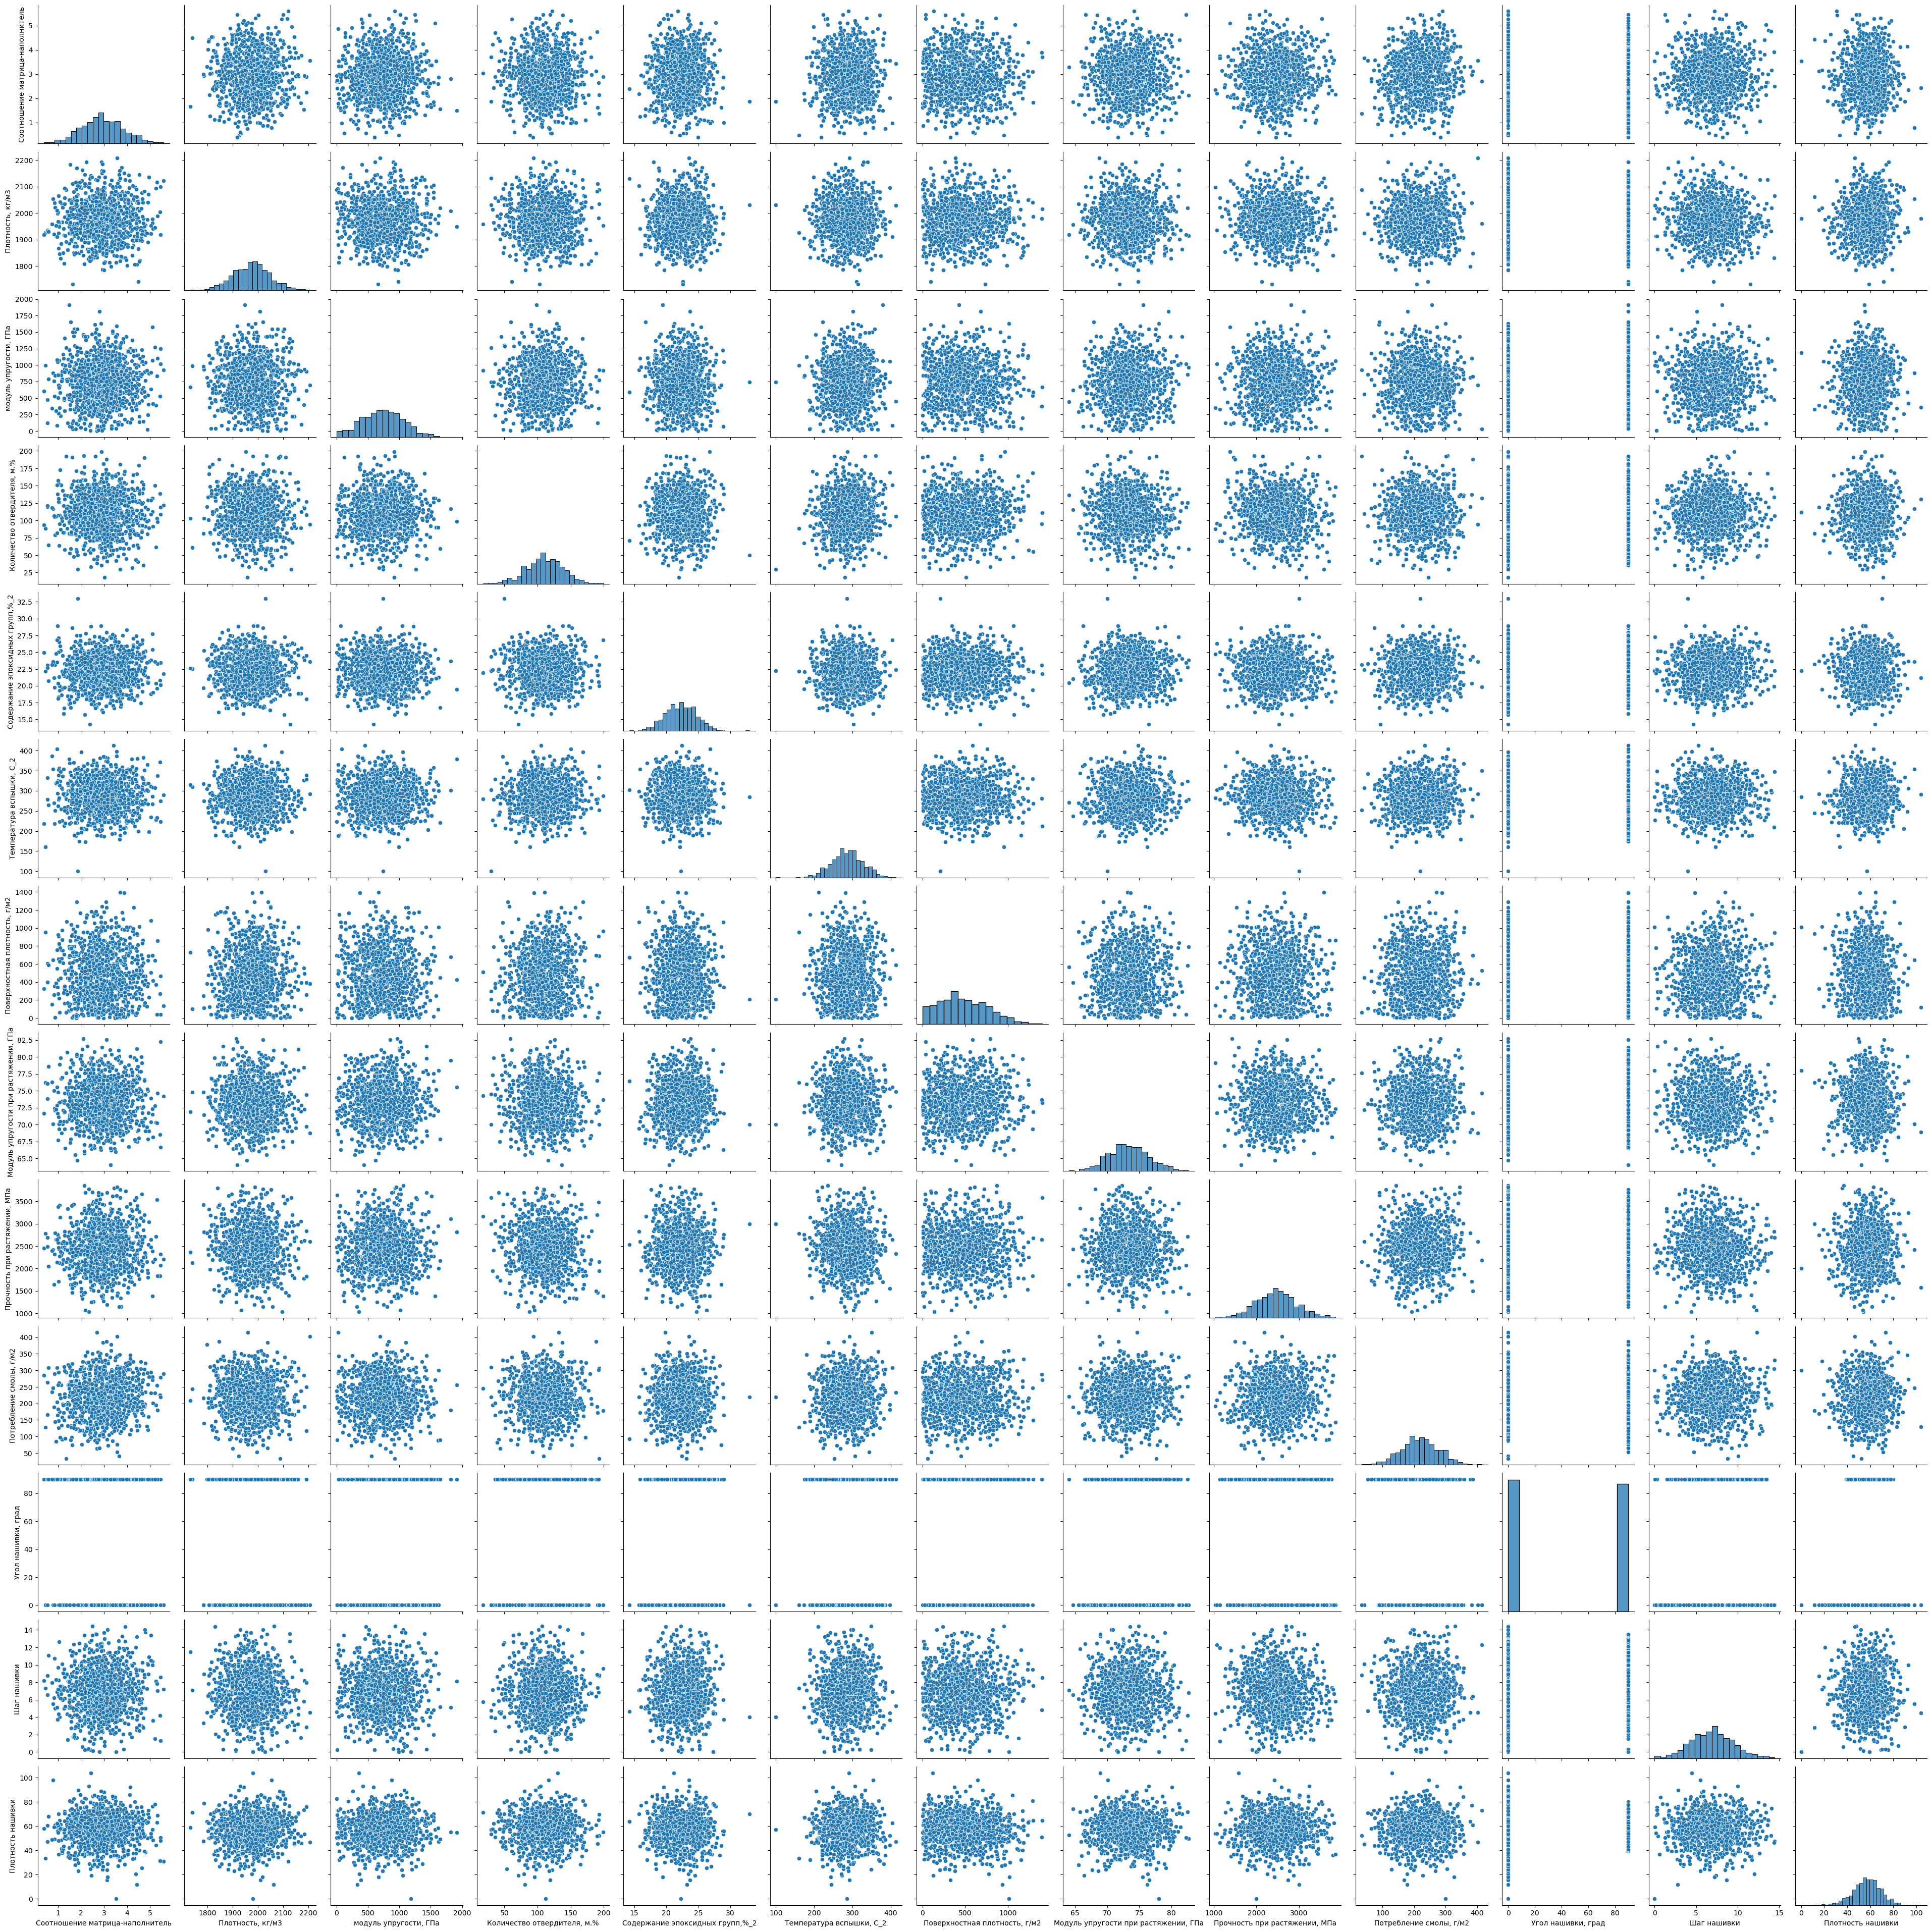

In [199]:
sns.pairplot(df, height=3);

Соотношение матрица-наполнитель: 3s=0 iq=6


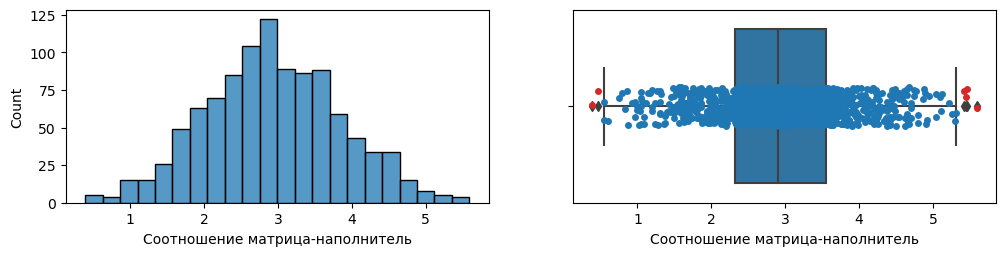

Плотность, кг/м3: 3s=3 iq=9


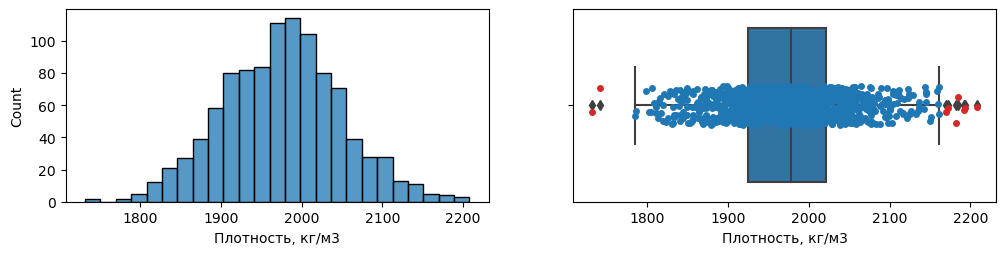

модуль упругости, ГПа: 3s=2 iq=2


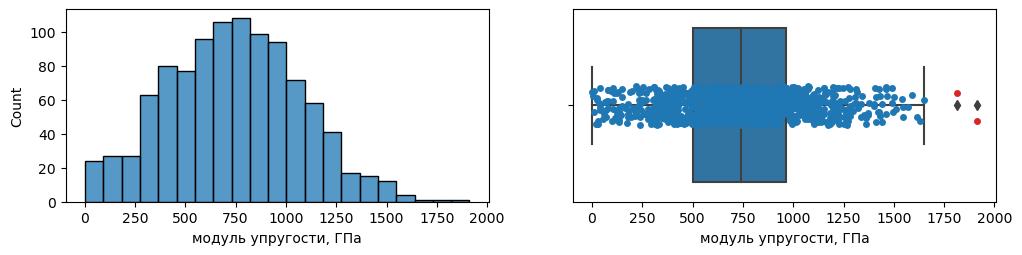

Количество отвердителя, м.%: 3s=2 iq=14


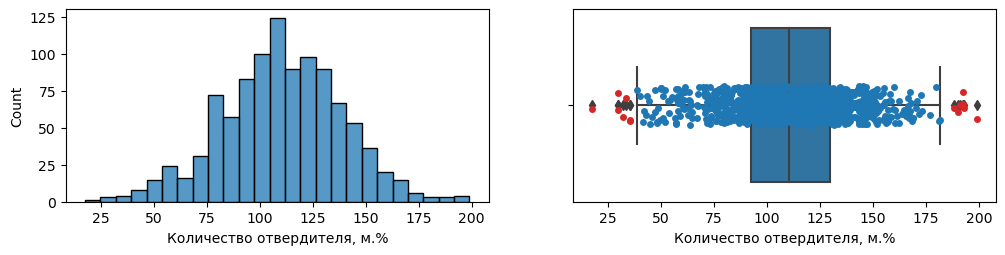

Содержание эпоксидных групп,%_2: 3s=2 iq=2


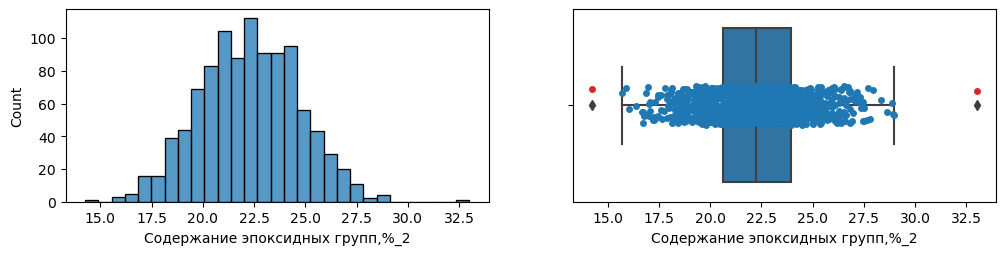

Температура вспышки, С_2: 3s=3 iq=8


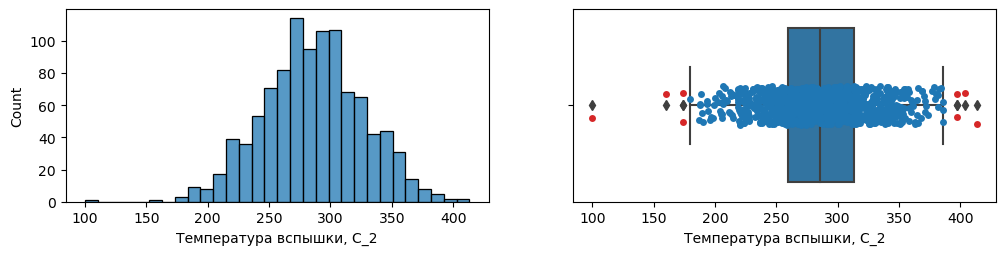

Поверхностная плотность, г/м2: 3s=2 iq=2


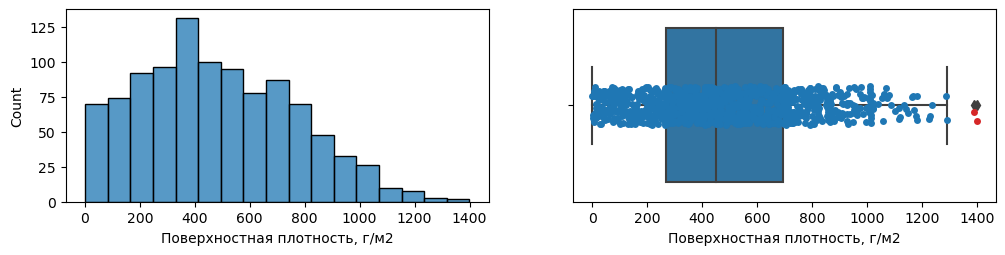

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


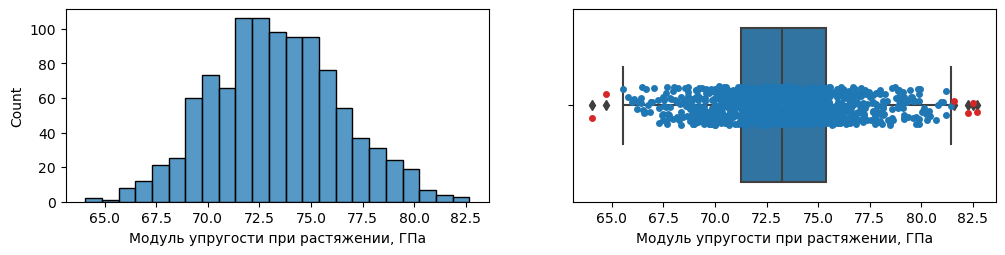

Прочность при растяжении, МПа: 3s=0 iq=11


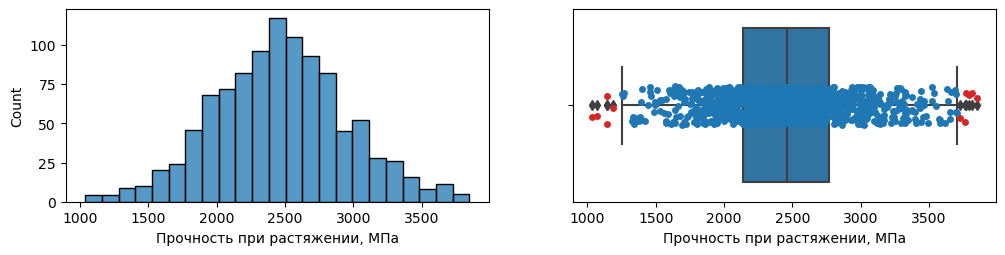

Потребление смолы, г/м2: 3s=3 iq=8


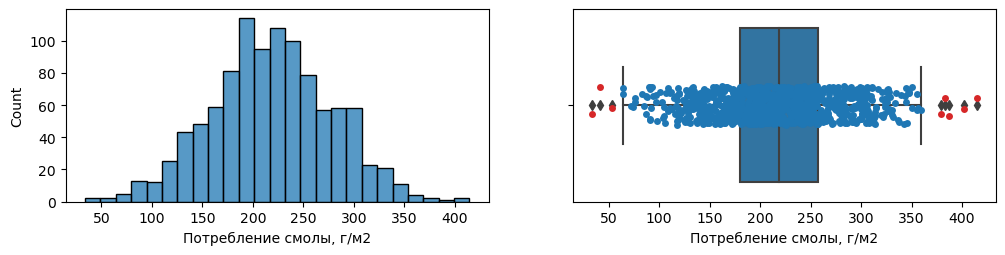

Угол нашивки, град: 3s=0 iq=0


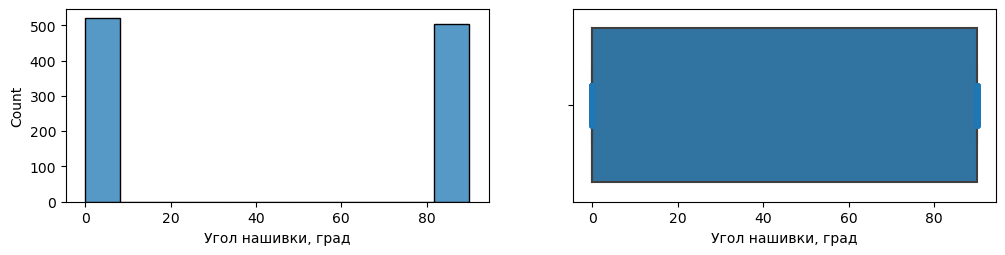

Шаг нашивки: 3s=0 iq=4


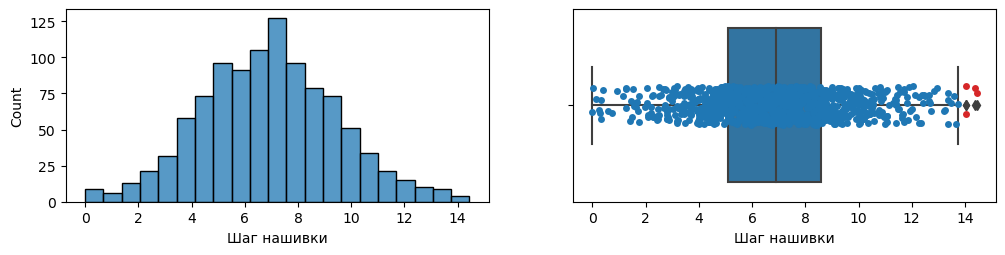

Плотность нашивки: 3s=7 iq=21


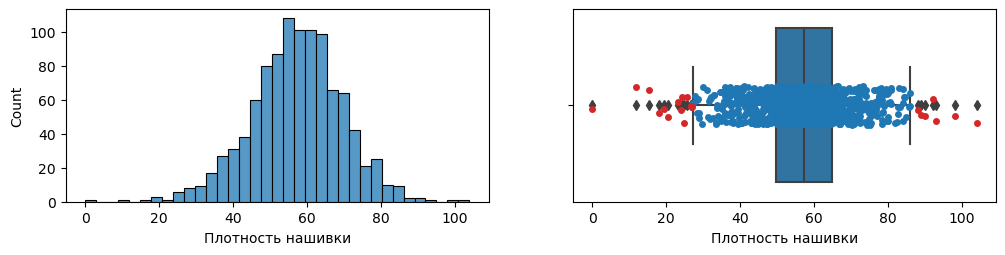

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [5]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column,  multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column,  ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [6]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
#     # визуализация выбросов
#     print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
#     fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
#     sns.histplot(data=d, x=column, color='purple', multiple='stack', legend=False, ax=axes[0])
#     sns.boxplot(data=d, x=column, color='tab:purple', ax=axes[1])
#     sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
#     sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
#     plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 10


In [8]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
#     # визуализация выбросов
#     print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
#     fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
#     sns.histplot(data=d, x=column, color='purple', multiple='stack', legend=False, ax=axes[0])
#     sns.boxplot(data=d, x=column, color='tab:purple', ax=axes[1])
#     sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
#     sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
#     plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 4


Соотношение матрица-наполнитель: 3s=0 iq=0


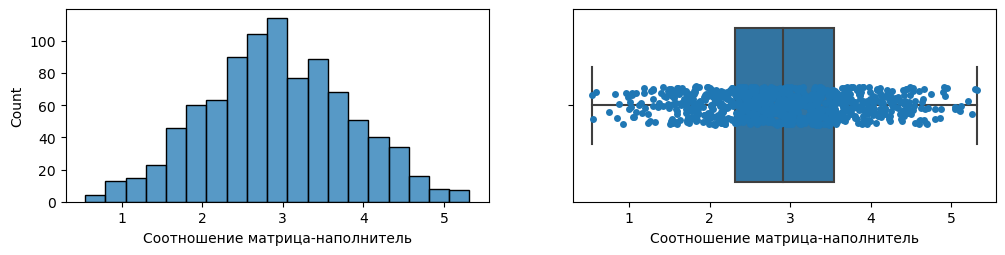

Плотность, кг/м3: 3s=0 iq=0


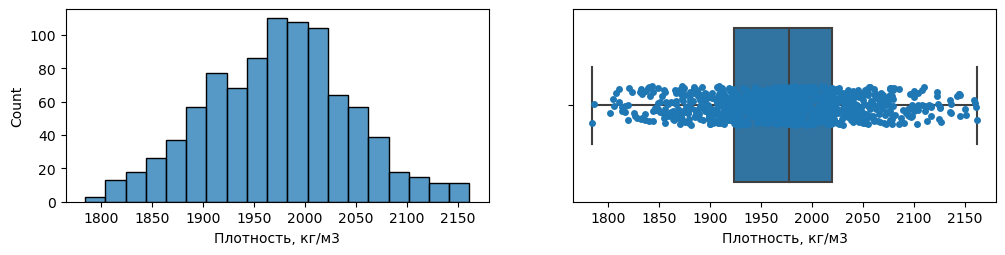

модуль упругости, ГПа: 3s=0 iq=0


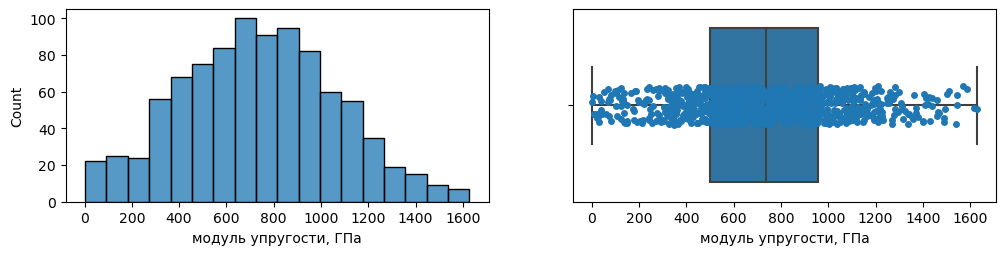

Количество отвердителя, м.%: 3s=0 iq=0


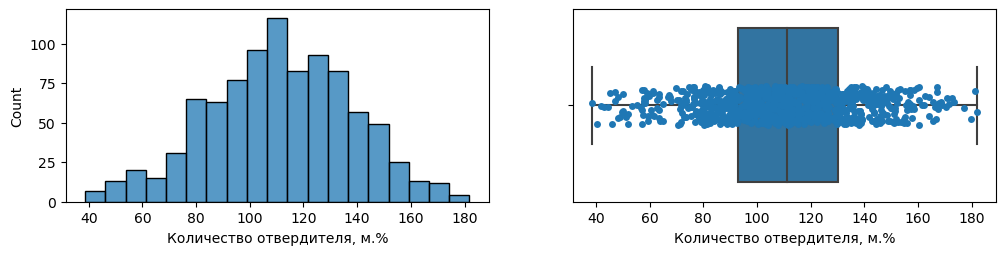

Содержание эпоксидных групп,%_2: 3s=0 iq=0


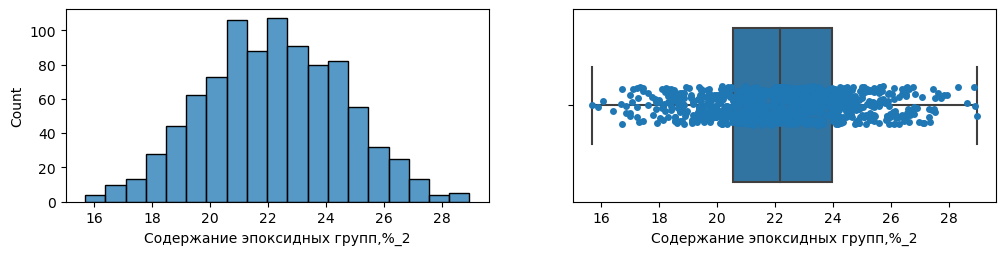

Температура вспышки, С_2: 3s=0 iq=0


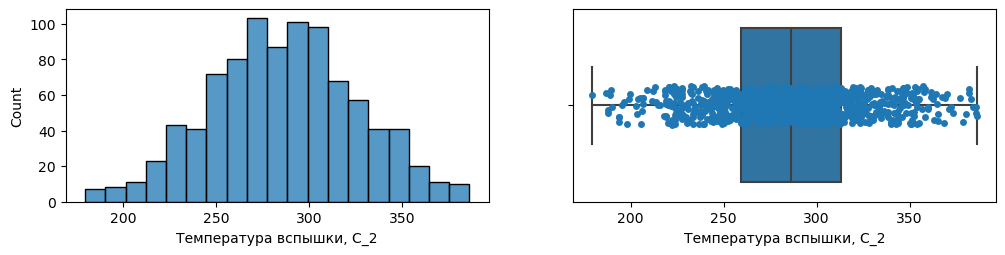

Поверхностная плотность, г/м2: 3s=0 iq=0


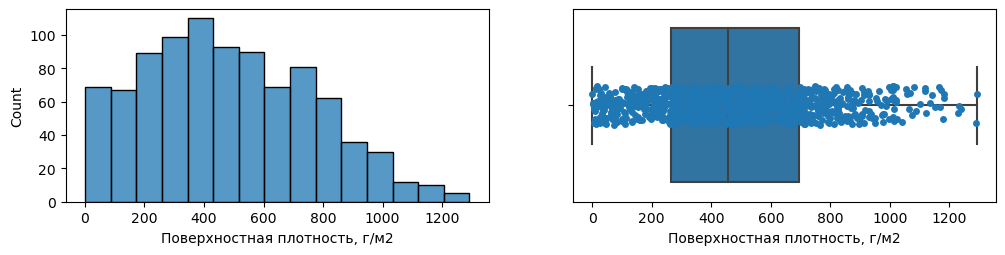

Модуль упругости при растяжении, ГПа: 3s=0 iq=0


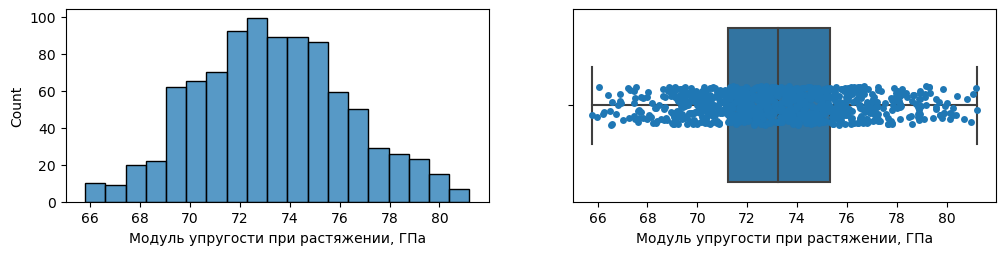

Прочность при растяжении, МПа: 3s=0 iq=0


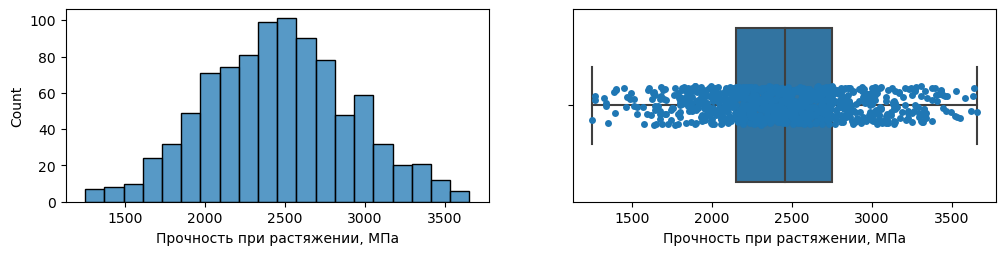

Потребление смолы, г/м2: 3s=0 iq=0


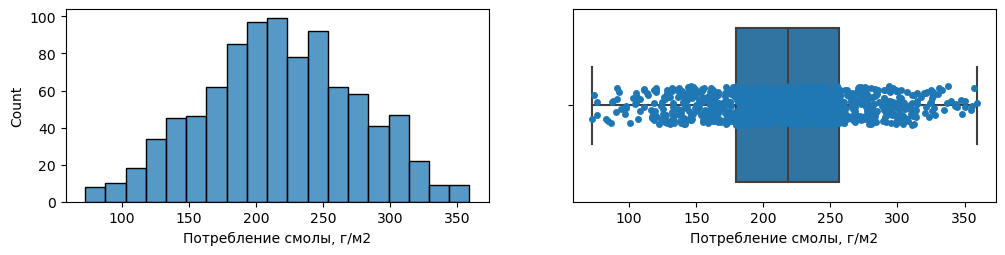

Угол нашивки, град: 3s=0 iq=0


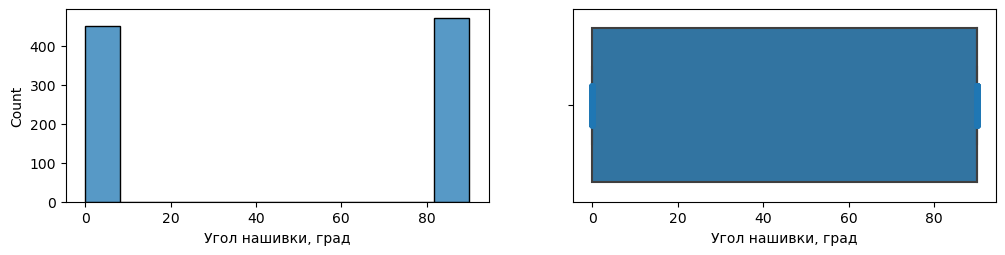

Шаг нашивки: 3s=0 iq=0


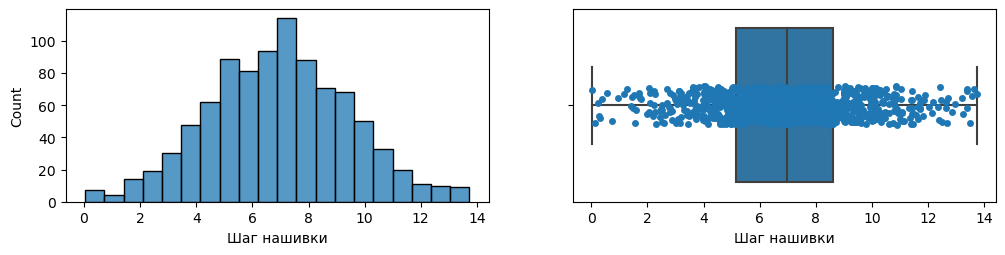

Плотность нашивки: 3s=0 iq=0


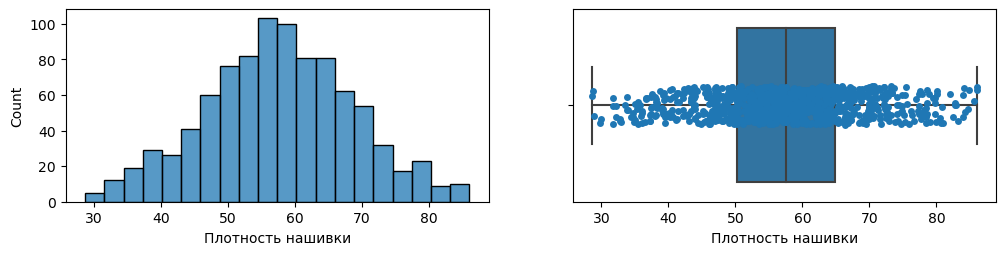

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 0


In [9]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [7]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       936.0     2.925683    0.893712   
Плотность, кг/м3                      936.0  1974.040023   70.808120   
модуль упругости, ГПа                 936.0   738.247627  328.708665   
Количество отвердителя, м.%           936.0   110.916216   27.037891   
Содержание эпоксидных групп,%_2       936.0    22.209030    2.394871   
Температура вспышки, С_2              936.0   286.040414   39.400677   
Поверхностная плотность, г/м2         936.0   482.993901  280.190377   
Модуль упругости при растяжении, ГПа  936.0    73.305127    3.037381   
Прочность при растяжении, МПа         936.0  2467.488822  463.838911   
Потребление смолы, г/м2               936.0   217.613374   57.827255   
Угол нашивки, град                    936.0    46.057692   45.011619   
Шаг нашивки                           936.0     6.915585    2.509672   
Плотность нашивки                     936.0    57.451895   11.239331   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.547391     2.321931     2.904731   
Плотность, кг/м3                      1784.482245  1923.443748  1977.258043   
модуль упругости, ГПа                    2.436909   498.577158   738.736842   
Количество отвердителя, м.%             38.668500    92.523816   111.113175   
Содержание эпоксидных групп,%_2         15.695894    20.571516    22.184713   
Температура вспышки, С_2               179.374391   259.184486   286.024118   
Поверхностная плотность, г/м2            0.603740   266.004099   457.732246   
Модуль упругости при растяжении, ГПа    65.553336    71.248823    73.259230   
Прочность при растяжении, МПа         1250.392802  2146.936034  2457.959767   
Потребление смолы, г/м2                 63.685698   179.489091   218.388715   
Угол нашивки, град                       0.000000     0.000000    90.000000   
Шаг нашивки                              0.037639     5.134988     6.943337   
Плотность нашивки                       27.272928    50.209656    57.584225   

                                              75%          max  
Соотношение матрица-наполнитель          3.546650     5.314144  
Плотность, кг/м3                      2020.158764  2161.565216  
модуль упругости, ГПа                  958.418993  1649.415706  
Количество отвердителя, м.%            130.001450   181.828448  
Содержание эпоксидных групп,%_2         23.961818    28.955094  
Температура вспышки, С_2               312.991425   386.067992  
Поверхностная плотность, г/м2          695.900862  1291.340115  
Модуль упругости при растяжении, ГПа    75.310788    81.417126  
Прочность при растяжении, МПа         2755.169485  3705.672523  
Потребление смолы, г/м2                256.396777   359.052220  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.591450    13.732404  
Плотность нашивки                       64.798211    86.012427

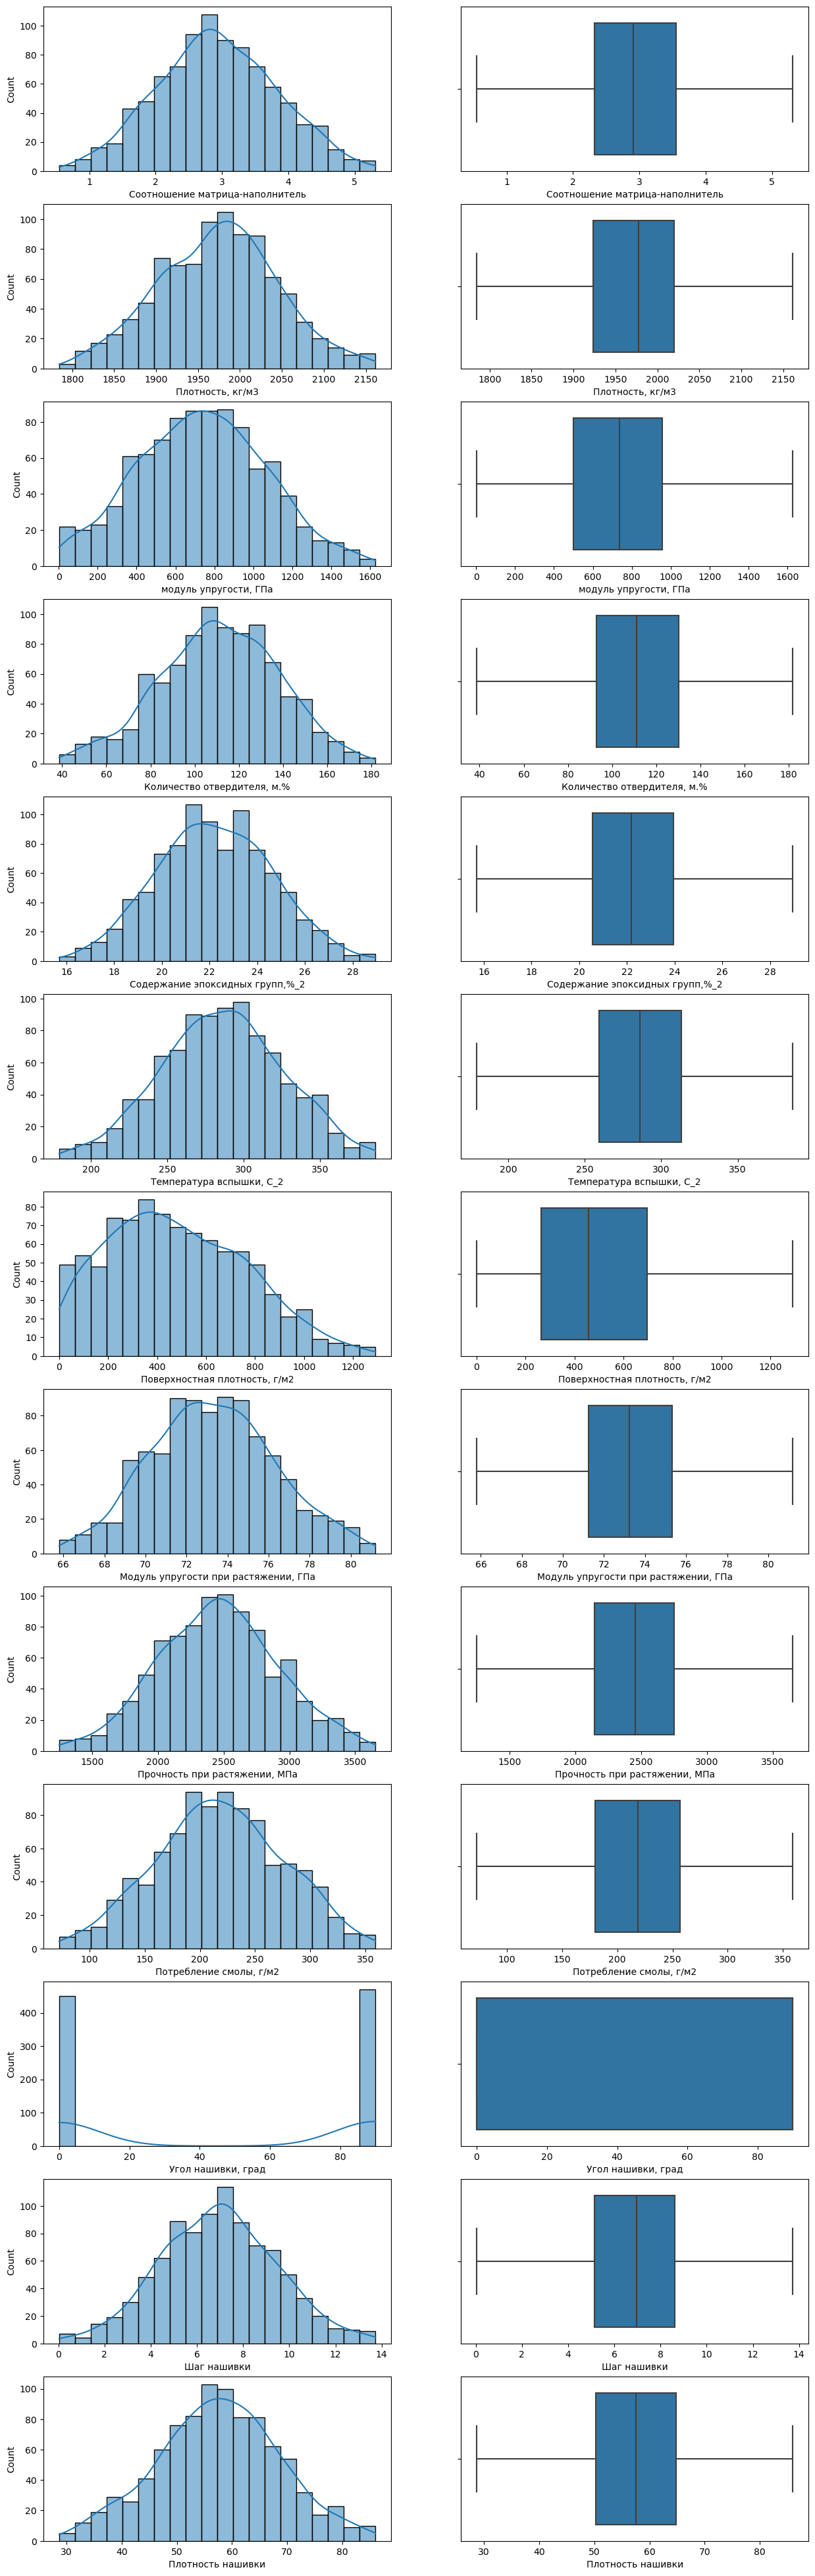

In [10]:
fig, axes = plt.subplots(13, 2, figsize=(15, 50))
for i, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i, 0])
    sns.boxplot(data=df, x=column, ax=axes[i, 1])    
plt.show()

In [11]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

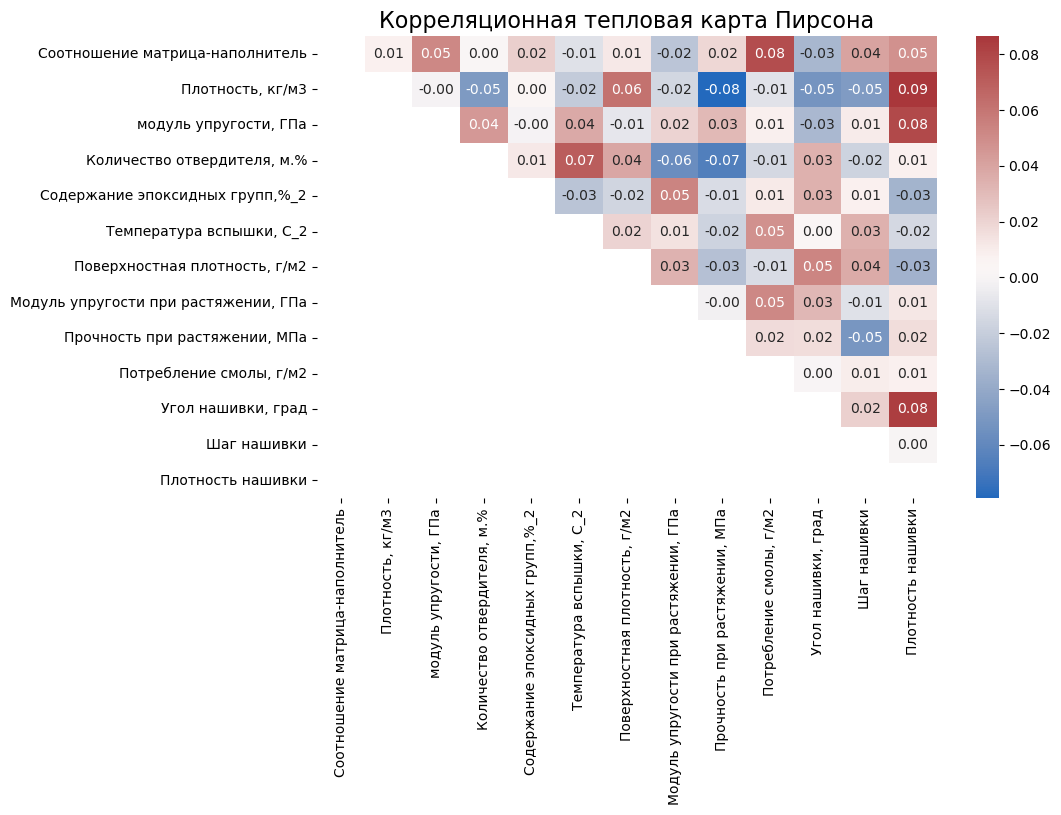

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
matrix = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='vlag', ax=ax, mask=matrix)
plt.title("Корреляционная тепловая карта Пирсона", fontsize=16)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки, град                    922 non-null    int64  
 11  Шаг нашивки       

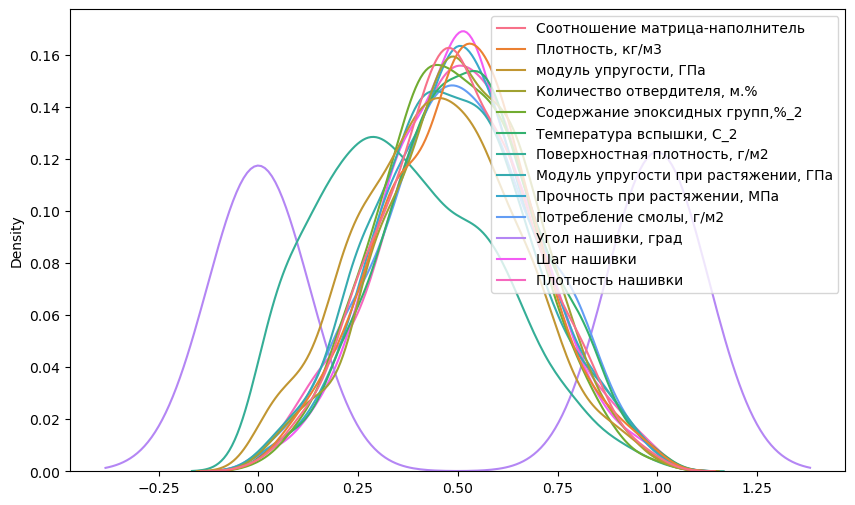

In [14]:

df = df.replace({'Угол нашивки, град':{0.0:0, 90.0:1}})
df.head()
scaler = MinMaxScaler()
dfsc = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
# pt = PowerTransformer()
# dfsc = pd.DataFrame(pt.fit_transform(dfsc), columns=dfsc.columns)
dfsc.describe().T
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=dfsc)
plt.show()

In [15]:
dfsc.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       922.0  0.499412  0.187858  0.0   
Плотность, кг/м3                      922.0  0.502904  0.188395  0.0   
модуль упругости, ГПа                 922.0  0.451341  0.201534  0.0   
Количество отвердителя, м.%           922.0  0.506200  0.186876  0.0   
Содержание эпоксидных групп,%_2       922.0  0.490578  0.180548  0.0   
Температура вспышки, С_2              922.0  0.516739  0.190721  0.0   
Поверхностная плотность, г/м2         922.0  0.373295  0.217269  0.0   
Модуль упругости при растяжении, ГПа  922.0  0.487343  0.196366  0.0   
Прочность при растяжении, МПа         922.0  0.503776  0.188668  0.0   
Потребление смолы, г/м2               922.0  0.507876  0.199418  0.0   
Угол нашивки, град                    922.0  0.510846  0.500154  0.0   
Шаг нашивки                           922.0  0.503426  0.183587  0.0   
Плотность нашивки                     922.0  0.503938  0.193933  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.371909  0.495189  0.629774  1.0  
Плотность, кг/м3                      0.368184  0.511396  0.624719  1.0  
модуль упругости, ГПа                 0.305188  0.451377  0.587193  1.0  
Количество отвердителя, м.%           0.378514  0.506382  0.638735  1.0  
Содержание эпоксидных групп,%_2       0.366571  0.488852  0.623046  1.0  
Температура вспышки, С_2              0.386228  0.516931  0.646553  1.0  
Поверхностная плотность, г/м2         0.204335  0.354161  0.538397  1.0  
Модуль упругости при растяжении, ГПа  0.353512  0.483718  0.617568  1.0  
Прочность при растяжении, МПа         0.373447  0.501481  0.624299  1.0  
Потребление смолы, г/м2               0.374647  0.510143  0.642511  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.372844  0.506414  0.626112  1.0  
Плотность нашивки                     0.376869  0.504310  0.630842  1.0

In [373]:
X_upr = dfsc.drop('Модуль упругости при растяжении, ГПа', axis=1)
y_upr = dfsc['Модуль упругости при растяжении, ГПа']
X_upr_train, X_upr_test, y_upr_train, y_upr_test = train_test_split(X_upr, y_upr, test_size=0.3, random_state=3000)
y_upr_train = y_upr_train.values
y_upr_test = y_upr_test.values
print(X_upr_train.shape)
print(X_upr_test.shape)
print(y_upr_train.shape)
print(y_upr_test.shape)

pca_num_components = 1

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_upr)

results = pd.DataFrame(reduced_data,columns=['pca'])


(648, 12)
(278, 12)
(648,)
(278,)


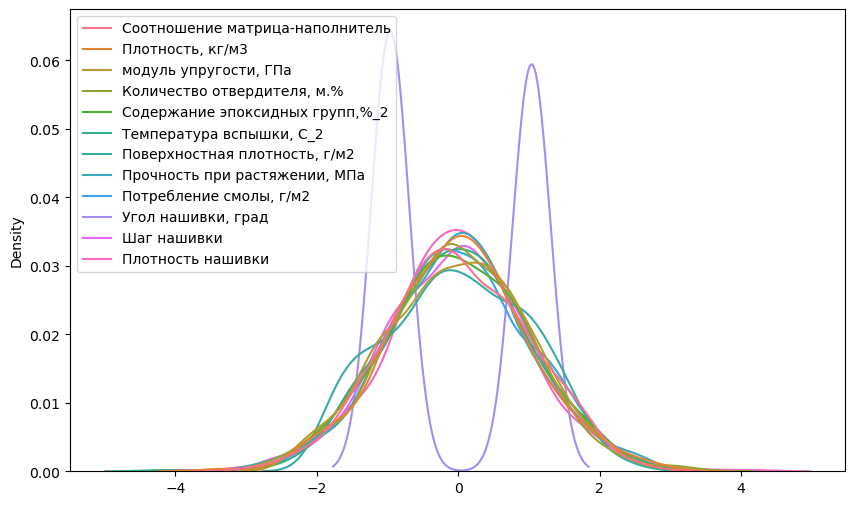

In [350]:
scaler = MinMaxScaler()
X_upr_train = pd.DataFrame(scaler.fit_transform(X_upr_train), columns = X_upr_train.columns)
X_upr_test = pd.DataFrame(scaler.fit_transform(X_upr_test), columns = X_upr_test.columns)

fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_upr_train)
plt.show()

In [359]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0     0.491691    0.500175   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                       1.000000     1.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [191]:
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(7, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) 
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) 
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) 
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) 
    return stat

In [60]:
show_statistics(X_upr_train )

In [374]:
# Сравнение моделей
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, X_upr_train, y_upr_train)
stat1_1.style.highlight_max(axis=0)

In [375]:
r2_scores = {}
mae_scores = {}
rmse_scores = {}
params = [{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
ridge_reg = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=42)

cv = GridSearchCV(estimator=ridge_reg,param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_upr_train, y_upr_train)
GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 0.0004, 'solver': 'lsqr'}
Лучший средний балл перекрестной проверки:
-0.19474693427272757


In [376]:
s_models1 = {}

In [377]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
899  {'alpha': 1500, 'positive': True, 'solver': 'lbfgs'} -0.156439     1

In [378]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
1  {'alpha': 0.005} -0.156417     1
2   {'alpha': 0.01} -0.156417     1
3   {'alpha': 0.05} -0.156417     1
4  {'alpha': 0.095} -0.156417     1
5    {'alpha': 0.1} -0.156417     1
6   {'alpha': 0.15} -0.156417     1
7    {'alpha': 0.2} -0.156417     1
8    {'alpha': 0.5} -0.156417     1
9      {'alpha': 1} -0.156417     1

In [379]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
16  {'C': 0.04, 'kernel': 'sigmoid'} -0.156381     1

In [380]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
13  {'n_neighbors': 29} -0.159547     1

In [381]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
208  {'criterion': 'poisson', 'max_depth': 2, 'max_features': 5, 'random_state': 3000, 'splitter': 'best'}   

          MAE  rank  
208 -0.155039     1

In [382]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, X_upr_train, y_upr_train)
stat1_2.style.highlight_max(axis=0)

In [86]:
show_statistics(pd.DataFrame(y_upr_test))
print(y_upr_test.shape)

(281,)


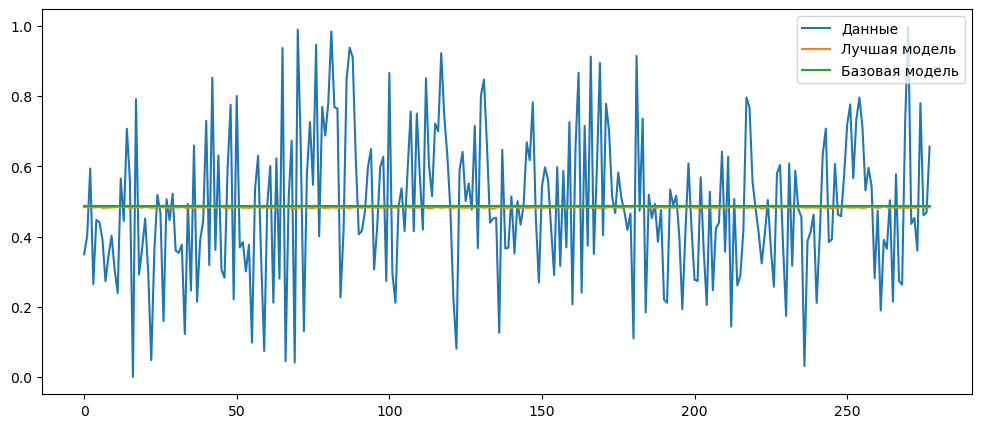

In [383]:
show_statistics(pd.DataFrame(y_upr_test))


base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(X_upr_train, y_upr_train)
y1_pred_base = base_model1.predict(X_upr_test)
best_model1 = SVR(C=0.04, kernel='sigmoid')
best_model1.fit(X_upr_train, y_upr_train)
y1_pred_best = best_model1.predict(X_upr_test)
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_upr_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [384]:
X_str = dfsc.drop('Прочность при растяжении, МПа', axis=1)
y_str = dfsc['Прочность при растяжении, МПа']
X_str_train, X_str_test, y_str_train, y_str_test = train_test_split(X_str, y_str, test_size=0.3, random_state=3000)
y_str_train = y_str_train.values
y_str_test = y_str_test.values
print(X_str_train.shape)
print(X_str_test.shape)
print(y_str_train.shape)
print(y_str_test.shape)

(648, 12)
(278, 12)
(648,)
(278,)


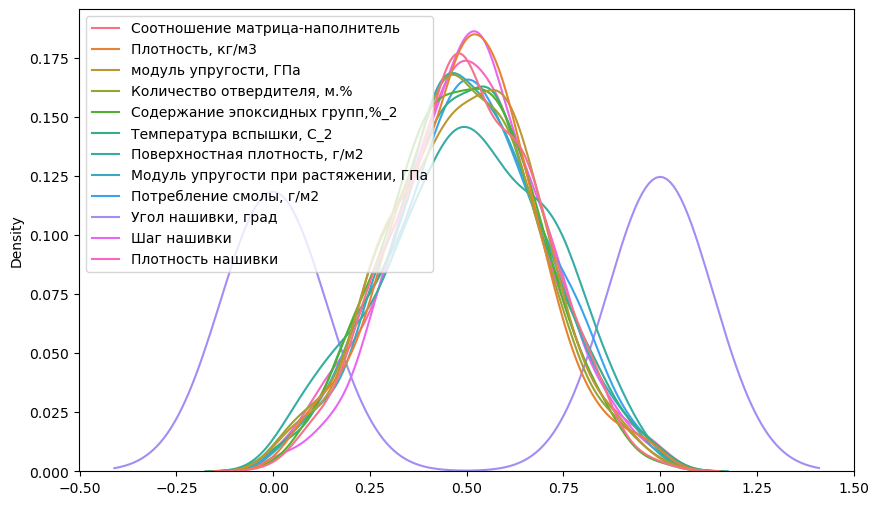

In [120]:
X_str_train = pd.DataFrame(pt.fit_transform(X_str_train), columns=X_str_train.columns)
X_str_test = pd.DataFrame(pt.transform(X_str_test), columns=X_str_test.columns)

scaler = MinMaxScaler()
X_str_train = pd.DataFrame(scaler.fit_transform(X_str_train), columns = X_str_train.columns)
X_str_test = pd.DataFrame(scaler.fit_transform(X_str_test), columns = X_str_test.columns)
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_str_train)
plt.show()

In [385]:
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, X_str_train, y_str_train)
stat2_1.style.highlight_max(axis=0)

In [386]:
s_models2 = {}

In [387]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
791  {'alpha': 990, 'positive': True, 'solver': 'lbfgs'} -0.151845     1

In [388]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
0  {'alpha': 0.1} -0.151815     1
1    {'alpha': 1} -0.151815     1
2    {'alpha': 5} -0.151815     1
3   {'alpha': 10} -0.151815     1
4   {'alpha': 20} -0.151815     1
5   {'alpha': 30} -0.151815     1
6   {'alpha': 40} -0.151815     1
7   {'alpha': 50} -0.151815     1
8   {'alpha': 60} -0.151815     1
9  {'alpha': 100} -0.151815     1

In [389]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
16  {'C': 0.001, 'kernel': 'sigmoid'} -0.151952     1

In [390]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
143  {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 2, 'random_state': 3000, 'splitter': 'random'}   

          MAE  rank  
143 -0.151191     1

In [131]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
12  {'loss': 'squared_error', 'max_depth': 2, 'max_features': 1, 'n_estimators': 50, 'random_state': 3000}   

           MAE  rank  
12 -374.945337     1

In [391]:
stat2_2 = run_models(s_models2, X_str_train, y_str_train)
stat2_2.style.highlight_max(axis=0)

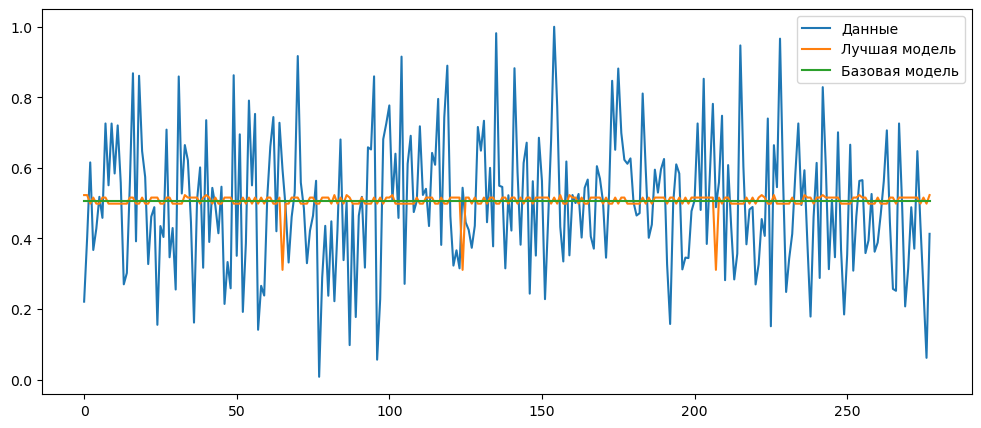

In [392]:
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(X_str_train, y_str_train)
y2_pred_base = base_model2.predict(X_str_test)
best_model2 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=2, random_state=3000, splitter='random') 	
best_model2.fit(X_str_train, y_str_train)
y2_pred_best = best_model2.predict(X_str_test)
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_str_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [393]:
compare2 = get_metrics('Базовая модель', y_str_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y_str_test, y2_pred_best))
compare2

C:\Users\dnikiforov\AppData\Local\Temp\ipykernel_24292\3189812068.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y_str_test, y2_pred_best))


R2      RMSE       MAE      MAPE  \
Базовая модель                      -0.000384  0.186987  0.149351  0.647493   
Лучшая модель (градиентный бустинг) -0.026690  0.189430  0.152706  0.653288   

                                     max_error  
Базовая модель                        0.497094  
Лучшая модель (градиентный бустинг)   0.490661

In [27]:
dm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.452951   
1                         0.274768          0.651097               0.452951   
2                         0.466552          0.651097               0.461725   
3                         0.465836          0.571539               0.458649   
4                         0.424236          0.332865               0.494944   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   
3                     0.511257                         0.495653   
4                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   
3                  0.509164                        0.16223   
4                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.272962                       0.727777   
1                              0.272962                       0.727777   
2                              0.272962                       0.727777   
3                              0.272962                       0.727777   
4                              0.272962                       0.727777   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                 0.514688                 0.0     0.289334   
1                 0.514688                 0.0     0.362355   
2                 0.514688                 0.0     0.362355   
3                 0.514688                 0.0     0.362355   
4                 0.514688                 0.0     0.362355   

   Плотность нашивки       PCA  
0           0.546433  0.525948  
1           0.319758  0.528072  
2           0.494123  0.522502  
3           0.546433  0.518717  
4           0.720799  0.507366

In [91]:
dma = dfsc.copy()



pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(dma)

print(reduced_data)

[[ 0.52279337 -0.24578185]
 [ 0.52493209 -0.1974817 ]
 [ 0.52200804 -0.22600626]
 ...
 [-0.50392613  0.12040984]
 [-0.48337022  0.18564654]
 [-0.52144562  0.12153791]]


C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


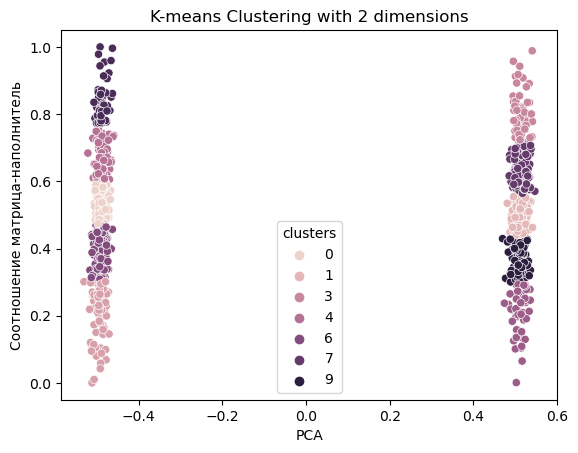

In [176]:
dma = dfsc.copy()



pca_num_components = 1

reduced_data = PCA(n_components=pca_num_components).fit_transform(dma)

#print(reduced_data)
# reduced_data.info()
results = pd.DataFrame(reduced_data,columns=['pca'])
# sns.histplot(data=results, x='pca', kde=True)
# dfp=y_upr.join(results, how='inner')
# dfp.head()
dma['PCA']= reduced_data
dfselecta = dma.loc[:,['Соотношение матрица-наполнитель', 'PCA']]

clustering_kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto")
# clustering_SC = SpectralClustering(n_clusters=2, n_neighbors=5, assign_labels='cluster_qr', random_state=0)
        
# nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(data)
# data.info()
# clustering_DBSCAN = DBSCAN(eps=0.01,  algorithm='auto', min_samples=2)
# distances, indices = nbrs.kneighbors(data)
# #print(distances, "\n \n", indices)
dfselecta['clusters'] = clustering_kmeans.fit_predict(dfselecta)
# data.head()
# data.describe()
# pca_num_components = 2

# reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
# results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="PCA", y="Соотношение матрица-наполнитель", hue=dfselecta['clusters'], data=dfselecta)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


# dfselect.head()
# sns.scatterplot(x="PCA", y="Соотношение матрица-наполнитель", data=dfselect)
# plt.title('PCA')
# plt.show()

In [177]:
dm['clusters'] = clustering_kmeans.fit_predict(dfselecta)
#dm.head()
dm.info()
# selected_data = data[data["clusters"] == 0]["Соотношение матрица-наполнитель"]
# selected_data = data[data["clusters"] != 0].drop(columns=["Соотношение матрица-наполнитель"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки, град                    922 non-null    float64
 11  Шаг нашивки        

C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [179]:
cluster0 = dm[dm["clusters"] == 0]
#cluster0.describe()
cluster1 = dm[dm["clusters"] == 1]
#cluster1.describe()
#dm.rename(columns={'Ratio':'Соотношение матрица-наполнитель'}, inplace=True)
most_representative_values = dm.groupby('clusters')['Соотношение матрица-наполнитель'].mean()

# Find the closest value from each cluster to its representative value
#closest_values = dm.groupby('clusters')['Ratio'].apply(lambda x: x[np.abs(x - x.mean()).argmin()] if len(x) > 0 else np.nan)

print(most_representative_values)
#print(closest_values)

clusters
0    0.534506
1    0.399765
2    0.370461
3    0.800941
4    0.632924
5    0.494488
6    0.212327
7    0.670885
8    0.214956
9    0.843966
Name: Соотношение матрица-наполнитель, dtype: float64


In [183]:
dmmc = dm.groupby('clusters').mean()
std_by_cluster = dm.groupby('clusters').std()
dmmc.head()
dmmc.describe()
X_matrix_filler = dmmc.drop(['Соотношение матрица-наполнитель','PCA'], axis=1)


y_matrix_filler = dmmc['Соотношение матрица-наполнитель']



X_matrix_filler.info()
y_matrix_filler.info()
X_matrix_train, X_matrix_test, y_matrix_train, y_matrix_test = train_test_split(X_matrix_filler, y_matrix_filler, test_size=0.3, random_state=3000)
y_matrix_train = y_matrix_train.values
y_matrix_test = y_matrix_test.values
print(X_matrix_train.shape)
print(X_matrix_test.shape)
print(y_matrix_train.shape)
print(y_matrix_test.shape)
#print(mean_by_cluster)
#print(std_by_cluster)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      10 non-null     float64
 1   модуль упругости, ГПа                 10 non-null     float64
 2   Количество отвердителя, м.%           10 non-null     float64
 3   Содержание эпоксидных групп,%_2       10 non-null     float64
 4   Температура вспышки, С_2              10 non-null     float64
 5   Поверхностная плотность, г/м2         10 non-null     float64
 6   Модуль упругости при растяжении, ГПа  10 non-null     float64
 7   Прочность при растяжении, МПа         10 non-null     float64
 8   Потребление смолы, г/м2               10 non-null     float64
 9   Угол нашивки, град                    10 non-null     float64
 10  Шаг нашивки                           10 non-null     float64
 11  Плотность нашивки     

In [291]:
#pt = PowerTransformer()
#X_matrix_train = pd.DataFrame(pt.fit_transform(X_matrix_train), columns=X_matrix_train.columns)
#X_matrix_test = pd.DataFrame(pt.transform(X_matrix_test), columns=X_matrix_test.columns)

scaler = StandardScaler()
X_matrix_train = pd.DataFrame(scaler.fit_transform(X_matrix_train), columns = X_matrix_train.columns)
X_matrix_test = pd.DataFrame(scaler.fit_transform(X_matrix_test), columns = X_matrix_test.columns)
# fig = plt.figure(figsize=(10, 6))
# sns.kdeplot(data=X_matrix_train)
# plt.show()



In [184]:
X_matrix_train.head()

Плотность, кг/м3  модуль упругости, ГПа  \
clusters                                            
0                 0.498067               0.440572   
2                 0.506427               0.438211   
5                 0.508851               0.461710   
6                 0.501613               0.426858   
1                 0.478988               0.439223   

          Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
clusters                                                                 
0                            0.488472                         0.470394   
2                            0.502536                         0.484726   
5                            0.495508                         0.469794   
6                            0.517573                         0.504381   
1                            0.514311                         0.509309   

          Температура вспышки, С_2  Поверхностная плотность, г/м2  \
clusters                                                            
0                         0.525545                       0.381663   
2                         0.519400                       0.358523   
5                         0.510553                       0.378026   
6                         0.530429                       0.364403   
1                         0.508868                       0.384026   

          Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
clusters                                                                        
0                                     0.484542                       0.506835   
2                                     0.496874                       0.522817   
5                                     0.458203                       0.504974   
6                                     0.523422                       0.487682   
1                                     0.502730                       0.508671   

          Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
clusters                                                             
0                        0.536676                 1.0     0.501217   
2                        0.503802                 0.0     0.458295   
5                        0.516016                 0.0     0.502435   
6                        0.507267                 1.0     0.515039   
1                        0.481349                 1.0     0.509329   

          Плотность нашивки  
clusters                     
0                  0.506721  
2                  0.508760  
5                  0.486220  
6                  0.540183  
1                  0.507736

In [185]:
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24),
    activation = 'tanh',
    solver='adam',
    max_iter=500,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [192]:
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, X_matrix_train, y_matrix_train)
stat2_1.style.highlight_max(axis=0)

C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two

C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two

Iteration 1, loss = 0.19598512
Validation score: -0.839329
Iteration 2, loss = 0.10763472
Validation score: 0.762909
Iteration 3, loss = 0.05889653
Validation score: -1.198873
Iteration 4, loss = 0.04460604
Validation score: -4.854009
Iteration 5, loss = 0.05267126
Validation score: -8.035601
Iteration 6, loss = 0.06644105
Validation score: -9.459893
Iteration 7, loss = 0.07388642
Validation score: -9.051842
Iteration 8, loss = 0.07184805
Validation score: -7.375717
Iteration 9, loss = 0.06275111
Validation score: -5.133590
Iteration 10, loss = 0.05074513
Validation score: -2.934629
Iteration 11, loss = 0.03964111
Validation score: -1.203833
Iteration 12, loss = 0.03200231
Validation score: -0.145612
Iteration 13, loss = 0.02878097
Validation score: 0.253990
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


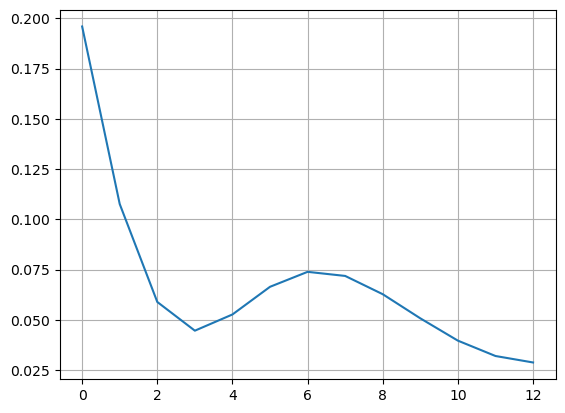

In [186]:
model3_1.fit(X_matrix_train, y_matrix_train)
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

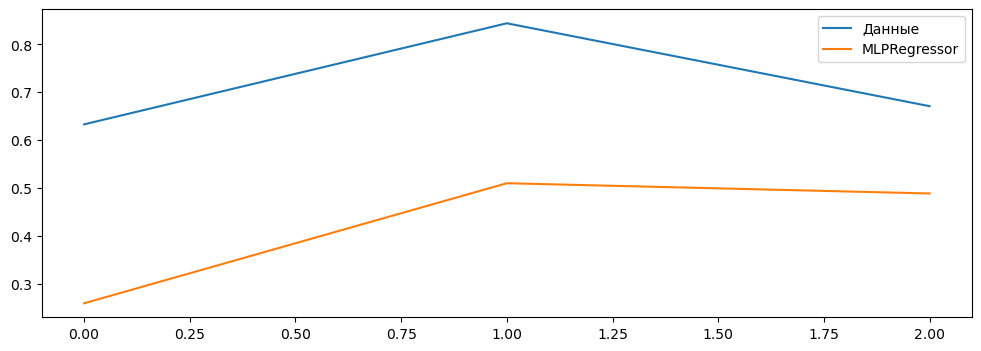

In [187]:
y3_pred_skl = model3_1.predict(X_matrix_test)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y3_pred_skl, label='MLPRegressor')
ax.legend()
plt.show()

In [188]:
base_model3 = DummyRegressor(strategy='mean')
base_model3.fit(X_matrix_train, y_matrix_train)
y3_pred_base = base_model3.predict(X_matrix_test)

compare3_1 = get_metrics('DummyRegressor', y_matrix_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y_matrix_test, y3_pred_skl))
compare3_1

C:\Users\dnikiforov\AppData\Local\Temp\ipykernel_8140\1735434023.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y_matrix_test, y3_pred_skl))


R2      RMSE       MAE      MAPE  max_error
DummyRegressor  -9.521213  0.297946  0.283433  0.386522   0.411474
MLPRegressor   -10.231993  0.307846  0.296602  0.419210   0.373575

In [117]:
from keras import regularizers
from tensorflow.python.keras.callbacks import TensorBoard

import random
random.seed(1000)
tf.random.set_seed(1000)



def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=48, activation='relu',kernel_regularizer=regularizers.l2(0.001), name='dense_1'), 
      
    keras.layers.Dense(units=24, activation='relu',kernel_regularizer=regularizers.l2(0.001), name='dense_2'),
      
      #  keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model
model3_2 = construct_model()
model3_2 = compile_model(model3_2)
model3_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 48)                624       
                                                                 
 dense_2 (Dense)             (None, 24)                1176      
                                                                 
 out (Dense)                 (None, 1)                 25        
                                                                 
Total params: 1825 (7.13 KB)
Trainable params: 1825 (7.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [224]:
pip install keras-layer-normalization


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4669 sha256=fd1840909cc624b1a9a30f6c700cc2df1cf6a423d7038198ebc11c63f2f70ee4
  Stored in directory: c:\users\dnikiforov\appdata\local\pip\cache\wheels\0f\c4\a1\24f1ca7fd39e75f4d8dab7feda6fe3e2163d8062b29f1169fb
Successfully built keras-layer-normalization


In [50]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [149]:
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [150]:
pip install pydot

In [151]:
pip install graphviz

                                              0.0/47.0 kB ? eta -:--:--
     ----------------------------------       41.0/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 799.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [118]:
%%time
#Обучение нейросети
history = model3_2.fit(
  X_matrix_train, 
  y_matrix_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
    shuffle=False,
    use_multiprocessing=False
)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 55.7556 - root_mean_squared_error: 0.2212 - val_loss: 2617388.5000 - val_root_mean_squared_error: 0.2936
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 49.7762 - root_mean_squared_error: 0.2790 - val_loss: 2935649.0000 - val_root_mean_squared_error: 0.2792
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 47.0472 - root_mean_squared_error: 0.2323 - val_loss: 3986235.7500 - val_root_mean_squared_error: 0.2300
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 47.2283 - root_mean_squared_error: 0.2016 - val_loss: 4089735.5000 - val_root_mean_squared_error: 0.2303
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 44.7727 - root_mean_squared_error: 0.2109 - val_loss: 3726324.7500 - val_root_mean_squared_error: 0.2527
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 44.3510 - root_mean_squared_error: 0.2240 - val_loss: 

8/8 [==============================] - 0s 6ms/step - loss: 38.6329 - root_mean_squared_error: 0.2053 - val_loss: 3983294.0000 - val_root_mean_squared_error: 0.2530
Epoch 48/50
8/8 [==============================] - 0s 6ms/step - loss: 38.3896 - root_mean_squared_error: 0.2048 - val_loss: 3988381.7500 - val_root_mean_squared_error: 0.2532
Epoch 49/50
8/8 [==============================] - 0s 6ms/step - loss: 38.3258 - root_mean_squared_error: 0.2045 - val_loss: 3944062.0000 - val_root_mean_squared_error: 0.2555
Epoch 50/50
8/8 [==============================] - 0s 6ms/step - loss: 38.3280 - root_mean_squared_error: 0.2051 - val_loss: 3976696.2500 - val_root_mean_squared_error: 0.2544
CPU times: total: 4.05 s
Wall time: 3.04 s


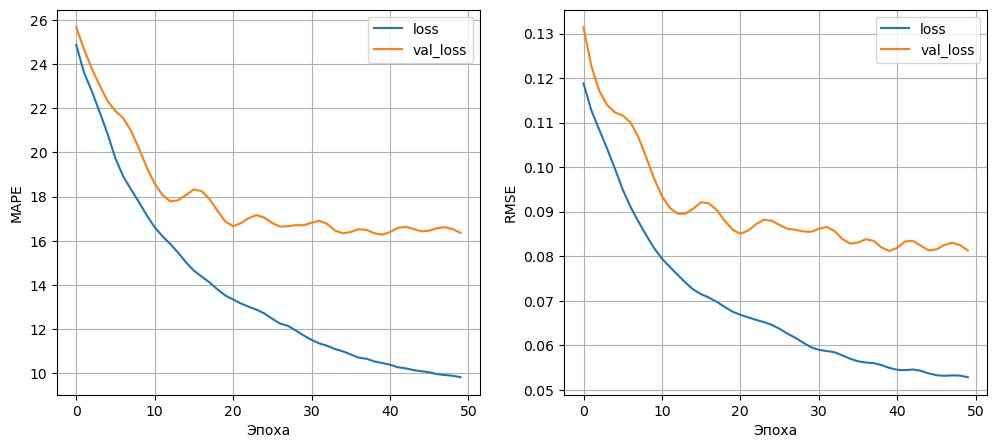

In [103]:
plot_loss(history.history)

In [103]:
y3_pred_keras2 = model3_2.predict(X_matrix_test)

9/9 [==============================] - 0s 1ms/step


5/5 [==============================] - 0s 2ms/step


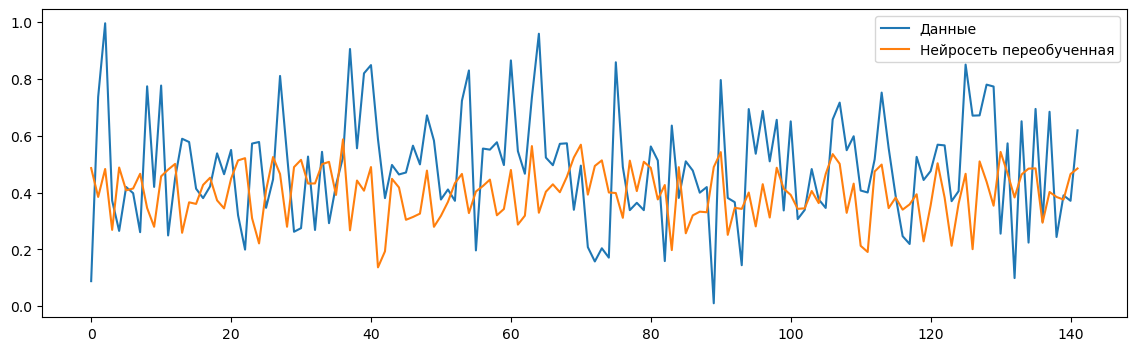

R2      RMSE       MAE      MAPE  max_error
Нейросеть переобученная -0.471631  0.234261  0.194102  0.788883   0.638304

In [121]:
y3_pred_keras2 = model3_2.predict(X_matrix_test)
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')

ax.legend()
plt.show()
get_metrics('Нейросеть переобученная', y_matrix_test, y3_pred_keras2)

In [122]:
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

#Обучение нейросети
history = model3_3.fit(
  X_matrix_train, 
  y_matrix_train,  
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
        shuffle=False,
    use_multiprocessing=False
)

Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 85.9748 - root_mean_squared_error: 0.4811 - val_loss: 2111570.5000 - val_root_mean_squared_error: 0.3472
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 51.0411 - root_mean_squared_error: 0.2620 - val_loss: 4309963.0000 - val_root_mean_squared_error: 0.2239
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 50.9689 - root_mean_squared_error: 0.1992 - val_loss: 4583631.0000 - val_root_mean_squared_error: 0.2187
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 48.3282 - root_mean_squared_error: 0.2021 - val_loss: 3978003.0000 - val_root_mean_squared_error: 0.2376


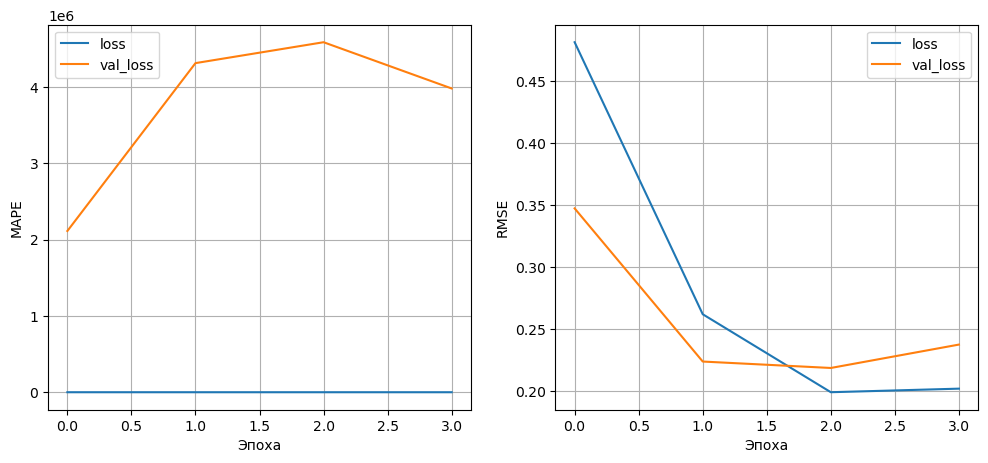

In [123]:
plot_loss(history.history)

In [56]:
y3_pred_keras3 = model3_3.predict(X_matrix_test)

9/9 [==============================] - 0s 0s/step


In [81]:
model3_3.evaluate(X_matrix_test, y_matrix_test)

9/9 [==============================] - 0s 2ms/step - loss: 37.8972 - root_mean_squared_error: 1.2670


[37.897193908691406, 1.2669711112976074]

5/5 [==============================] - 0s 0s/step - loss: 85.6188 - root_mean_squared_error: 0.4502


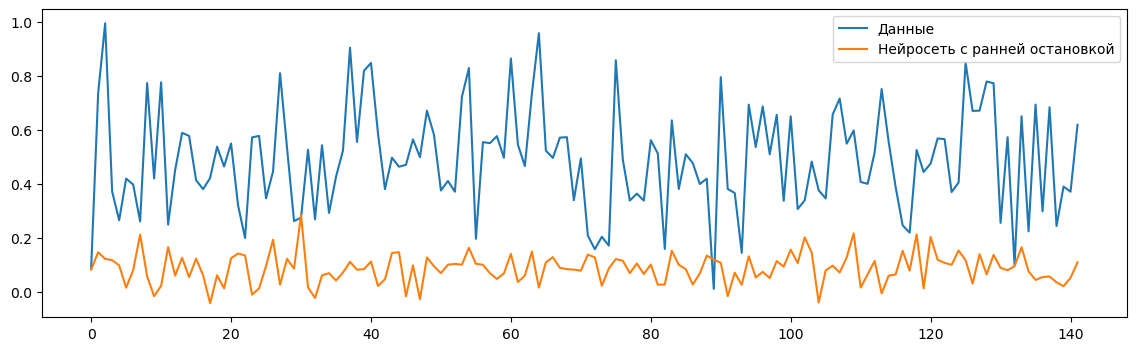

R2      RMSE       MAE      MAPE  \
Нейросеть с ранней остановкой -4.434915  0.450191  0.405499  0.855703   

                               max_error  
Нейросеть с ранней остановкой   0.944241

In [120]:
y3_pred_keras3 = model3_3.predict(X_matrix_test)
model3_3.evaluate(X_matrix_test, y_matrix_test)
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')

ax.legend()
plt.show()
get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3)

In [42]:
#compare3_2 = get_metrics('DummyRegressor', y_matrix_test, y3_pred_base)
get_metrics('Нейросеть переобученная', y_matrix_test, y3_pred_keras2)
#get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3)
#compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y_matrix_test, y3_pred_keras2))
#compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3))

R2      RMSE       MAE     MAPE  max_error
Нейросеть переобученная -0.387022 -1.094245 -0.869585 -0.32441  -3.066794

9/9 [==============================] - 0s 0s/step


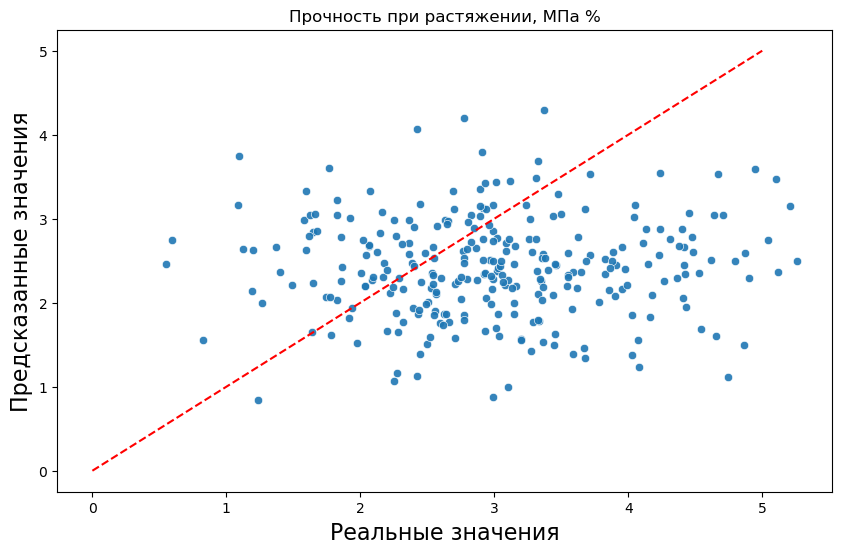

In [84]:
test_predictions = model3_3.predict(X_matrix_test).flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_matrix_test, y=test_predictions, alpha=0.9)
line_X = np.linspace(0, 5, 5)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Прочность при растяжении, МПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

In [59]:
get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3)

R2     RMSE       MAE      MAPE  \
Нейросеть с ранней остановкой -0.331323 -1.07205 -0.848245 -0.311998   

                               max_error  
Нейросеть с ранней остановкой  -3.240979

In [78]:
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
       keras.layers.Dense(units=24, activation='relu', name='dense_3'),
#       keras.layers.Dropout(0.05, name='dropout_3'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_4'),
#       keras.layers.Dropout(0.05, name='dropout_4'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_5'),
#       keras.layers.Dropout(0.05, name='dropout_5'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_6'),
#       keras.layers.Dropout(0.05, name='dropout_6'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_7'),
#       keras.layers.Dropout(0.05, name='dropout_7'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_8'),
#       keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])
model3_4 = compile_model(model3_4)
model3_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 out (Dense)                 (None, 1)                 25        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (

In [79]:
history = model3_4.fit(
  X_matrix_train, 
  y_matrix_train,  
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  
        shuffle=False,
    use_multiprocessing=False
)

Epoch 1/50
15/15 [==============================] - 1s 12ms/step - loss: 104.6248 - root_mean_squared_error: 3.1690 - val_loss: 94.6534 - val_root_mean_squared_error: 2.8661
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 86.9162 - root_mean_squared_error: 2.7393 - val_loss: 75.1377 - val_root_mean_squared_error: 2.3935
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 66.0788 - root_mean_squared_error: 2.2376 - val_loss: 51.8181 - val_root_mean_squared_error: 1.8111
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 46.0122 - root_mean_squared_error: 1.6493 - val_loss: 32.9789 - val_root_mean_squared_error: 1.1956
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 37.6052 - root_mean_squared_error: 1.2563 - val_loss: 32.5855 - val_root_mean_squared_error: 1.0439
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 35.6306 - root_mean_squared_error: 1.1712 - val_loss: 31.3256 - va

15/15 [==============================] - 0s 4ms/step - loss: 25.0671 - root_mean_squared_error: 0.9069 - val_loss: 32.2056 - val_root_mean_squared_error: 1.0574
Epoch 49/50
15/15 [==============================] - 0s 3ms/step - loss: 24.0591 - root_mean_squared_error: 0.8763 - val_loss: 32.4516 - val_root_mean_squared_error: 1.0475
Epoch 50/50
15/15 [==============================] - 0s 4ms/step - loss: 24.3515 - root_mean_squared_error: 0.8992 - val_loss: 32.3928 - val_root_mean_squared_error: 1.0528


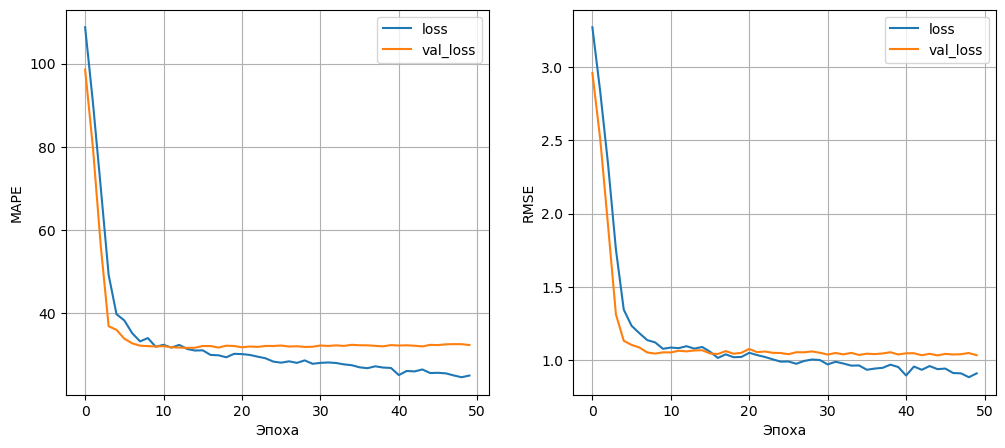

In [76]:
plot_loss(history.history)

9/9 [==============================] - 0s 2ms/step - loss: 33.6288 - root_mean_squared_error: 1.1480


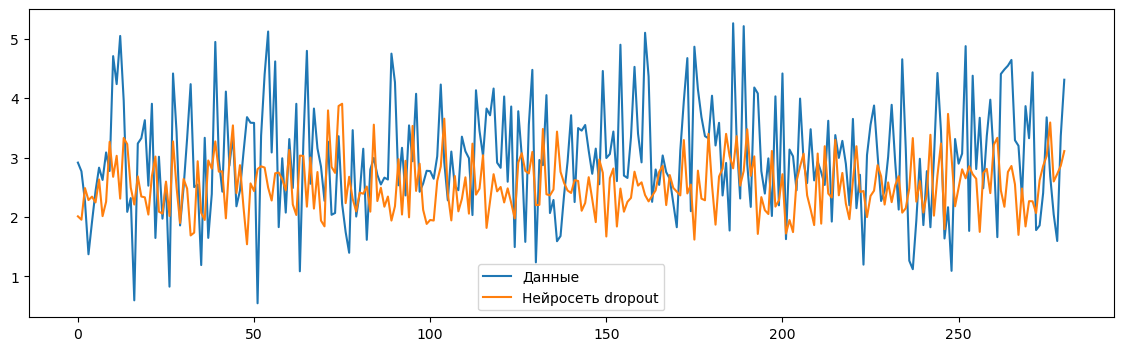

R2      RMSE       MAE      MAPE  max_error
Нейросеть dropout -0.526577 -1.147975 -0.925247 -0.336288   -3.24553

In [80]:
y4_pred_keras4 = model3_4.predict(X_matrix_test)
model3_4.evaluate(X_matrix_test, y_matrix_test)
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y4_pred_keras4, label='Нейросеть dropout')

ax.legend()
plt.show()
get_metrics('Нейросеть dropout', y_matrix_test, y4_pred_keras4)